# Projeto Regressão Linear: Ecommerce Clients

Neste projeto trabalhamos com um conjunto de dados [disponível no Kaggle](https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website). Os dados incluem informações sobre clientes de um site de comércio eletrônico, incluindo o seguinte:

- Média Duração da sessão: sessão média de sessões de aconselhamento de estilo na loja.
- Tempo no aplicativo: tempo médio gasto no aplicativo em minutos
- Tempo no site: tempo médio gasto no site em minutos
- Duração da associação: há quantos anos o cliente é membro.

Neste projeto, supomos que a empresa esteja tentando decidir se concentrará seus esforços na experiência do aplicativo móvel ou no site. Estamos aqui para ajudá-los a tomar uma decisão baseada em dados.

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Obtendo os Dados

Como já foi mencionado, o data set vem de um conjunto de dados do Kaggle.
[o link se encontra aqui](https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website)

In [147]:
df_data = pd.read_csv('Ecommerce Customers')

In [148]:
df_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [149]:
df_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [150]:
df_data.info()
df_data.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Análise exploratória de Dados

Primeiramente fazemos a seguinte pergunta: Como o tempo gasto do cliente em cada plataforma está relacionado ao valor que ele gasta por ano? Não parece haver muita correlação entre o tempo no site para desktop e o valor que os clientes gastam por ano. Por outro lado, o segundo gráfico mostra que parece haver uma pequena correlação entre o tempo gasto no aplicativo e os gastos anuais. Provavelmente isso ocorre porque esses clientes tendem a gastar menos tempo navegando no telefone. Talvez o processo de pagamento seja mais rápido no aplicativo ou as frases de chamariz tenham mais sucesso lá.

Depois de analisar o par gráfico, vemos que parece haver uma grande correlação positiva entre duas variáveis: o tempo de adesão e as despesas anuais. No final, recriamos este gráfico para visualizar a linha de regressão.

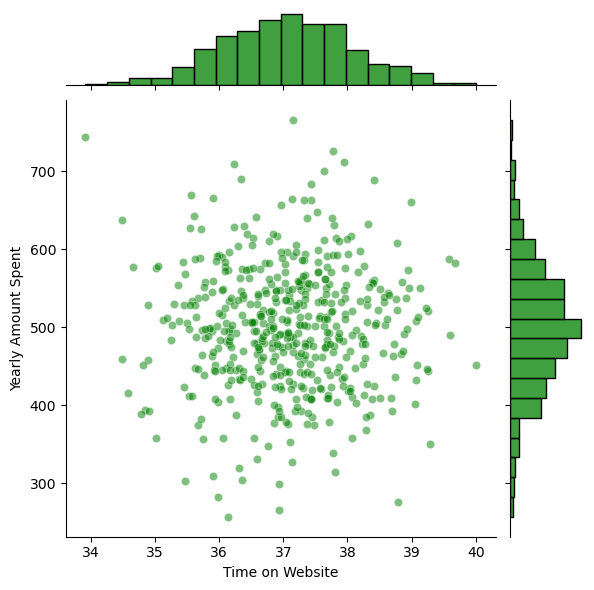

In [151]:
#Tempo no site x valor gasto anual 
sns.jointplot(data=df_data,x='Time on Website',y='Yearly Amount Spent',alpha=0.5,color='Green');

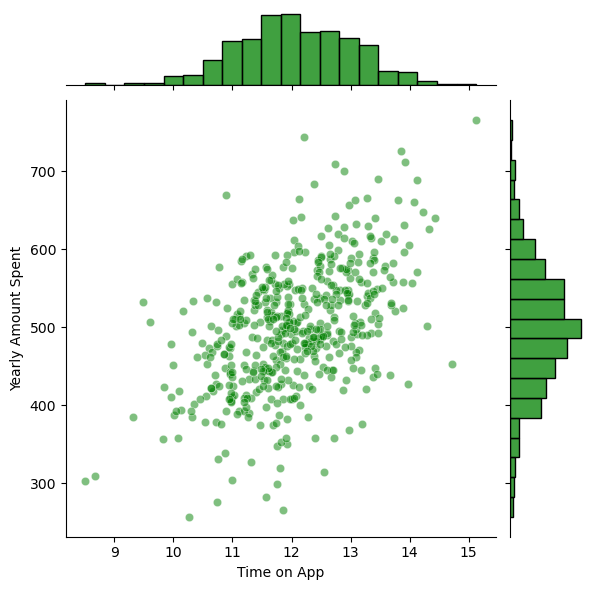

In [152]:
#Tempo no app x valor gasto anual 
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df_data, alpha=0.5,color='Green');

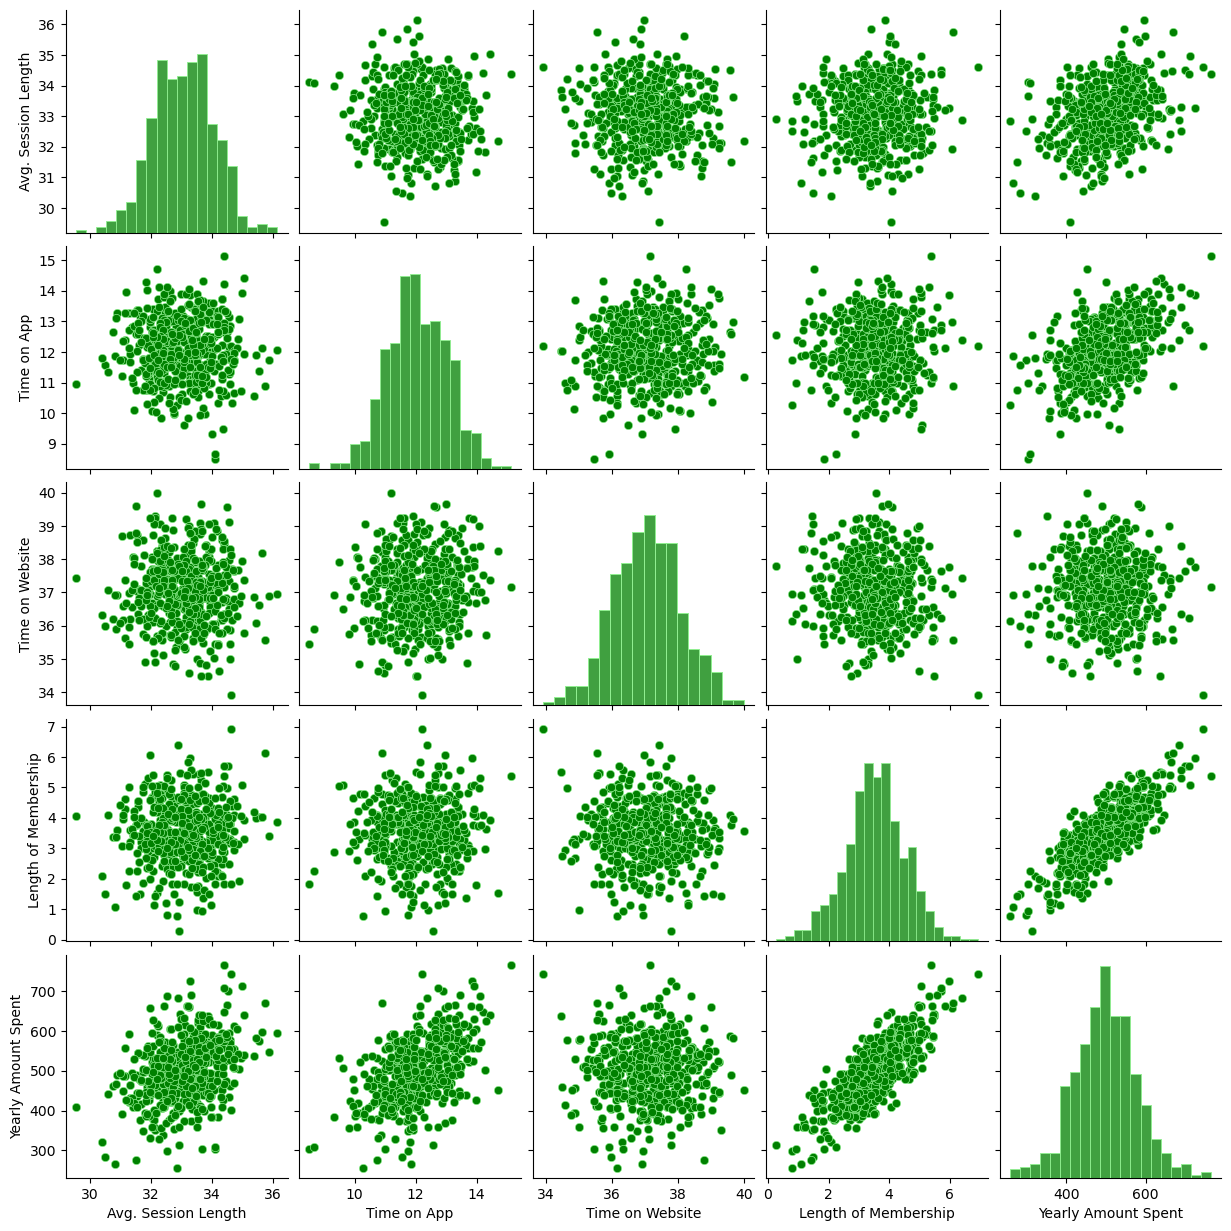

In [153]:
sns.pairplot(data=df_data,
            plot_kws = {'color': 'green', 'edgecolor': 'lightgreen'}, diag_kws = {'color': 'green', 'edgecolor': 'lightgreen'});

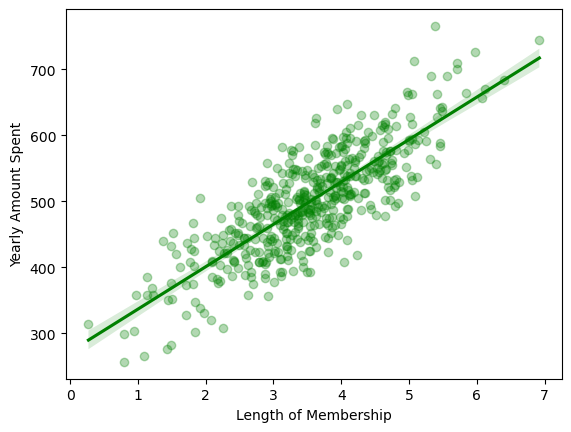

In [154]:
# Duração da associação x valor gasto anual
sns.regplot(x='Length of Membership', 
           y='Yearly Amount Spent', 
           data=df_data,
           scatter_kws={'alpha':0.3},color='Green');

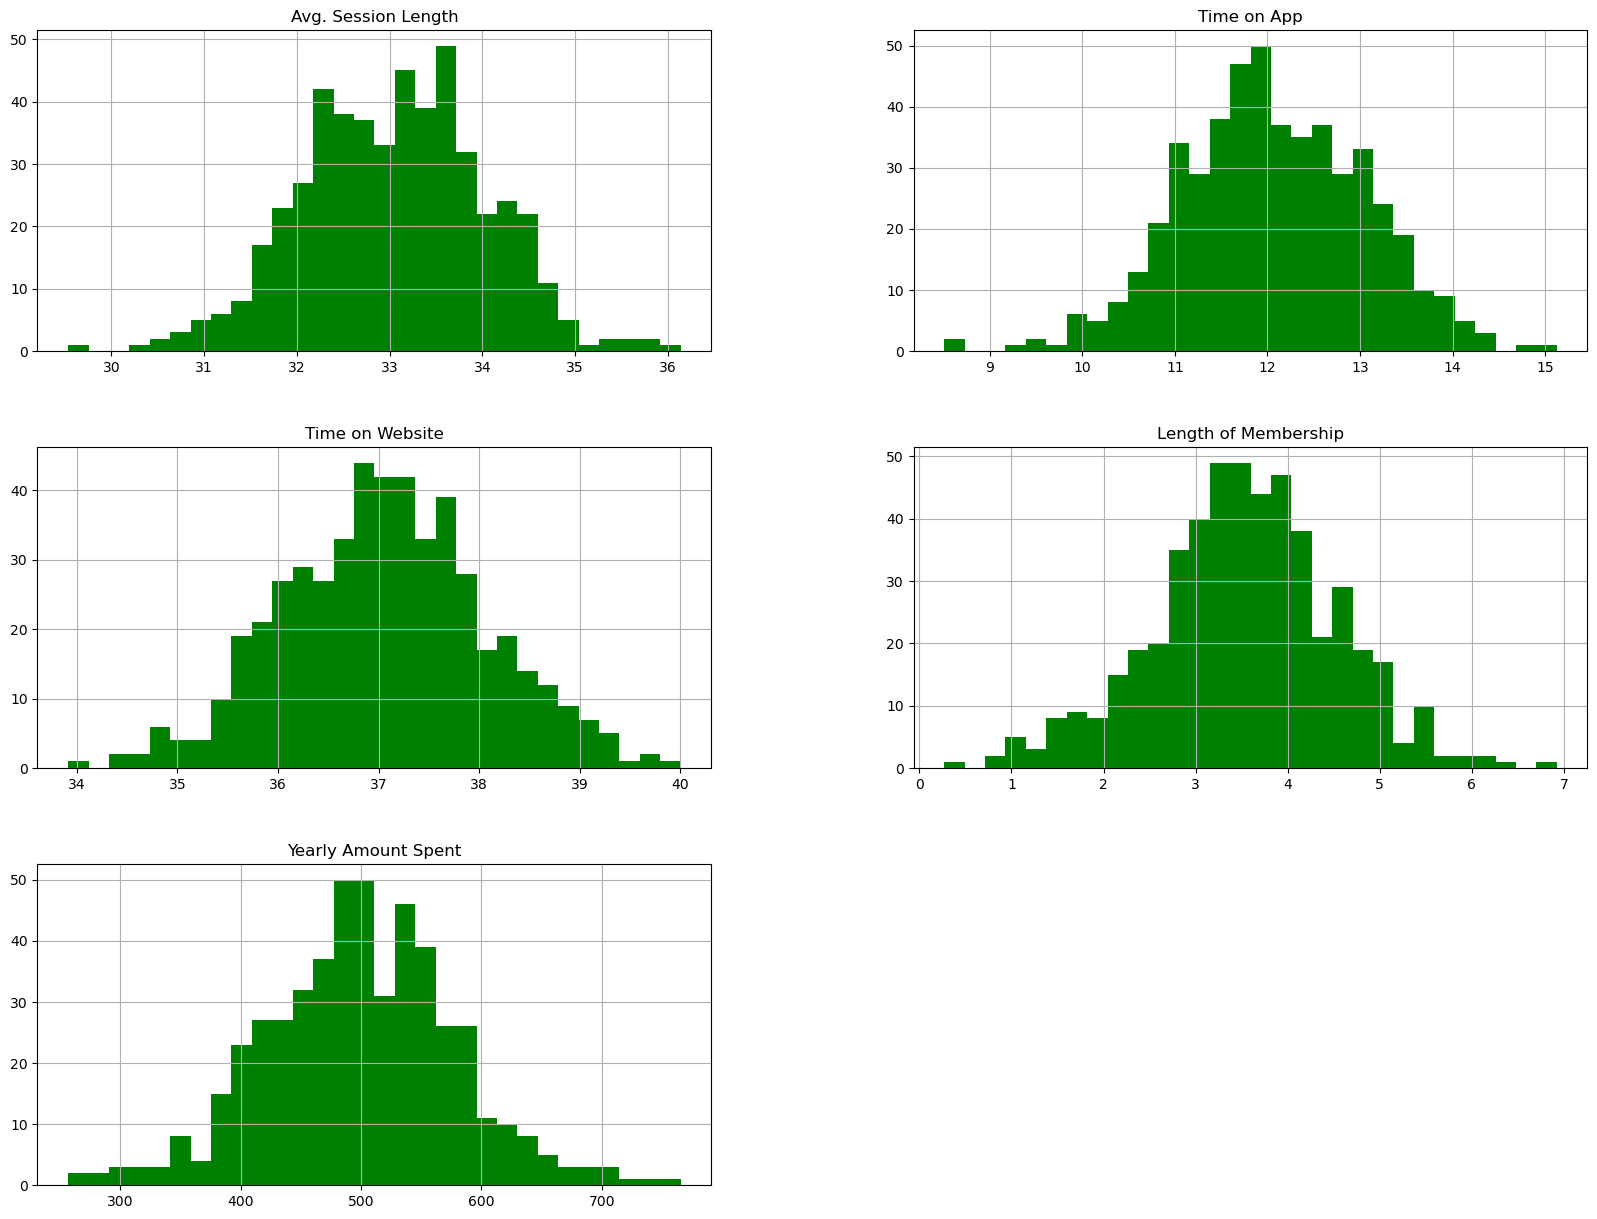

In [155]:
df_data.hist(bins=30,figsize=(20,15),color='green'); # Analisando a distribuição

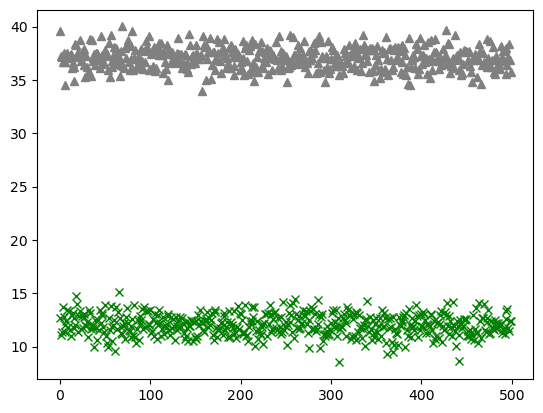

In [178]:
plt.plot(df_data['Time on Website'],'^',color='Gray')
plt.plot(df_data['Time on App'],'x',color='Green')

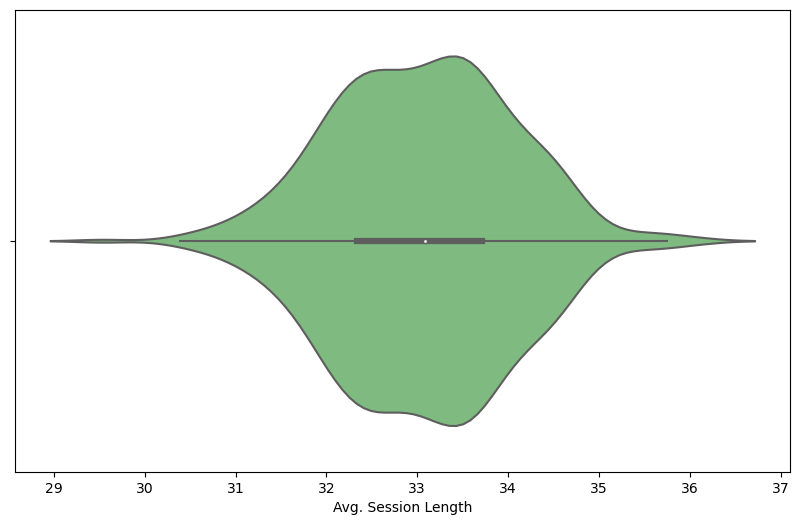

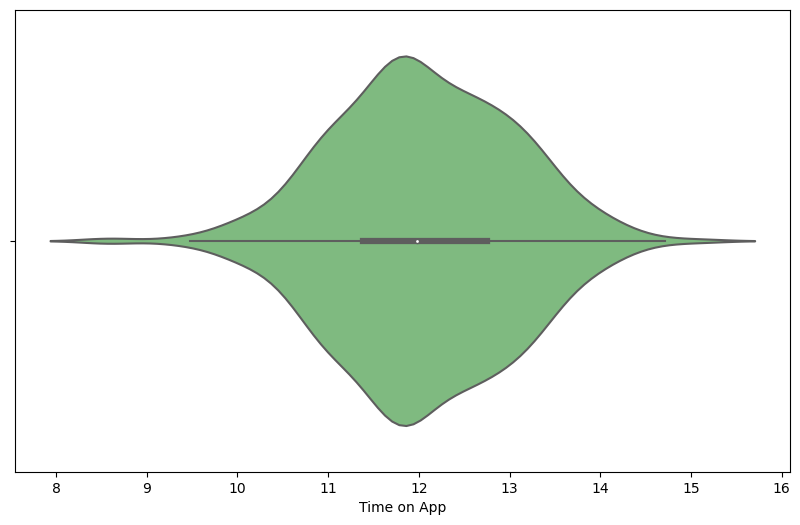

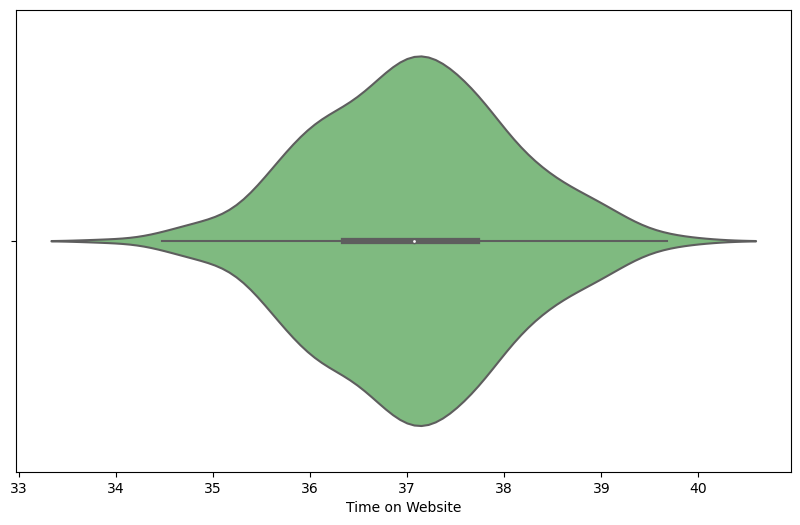

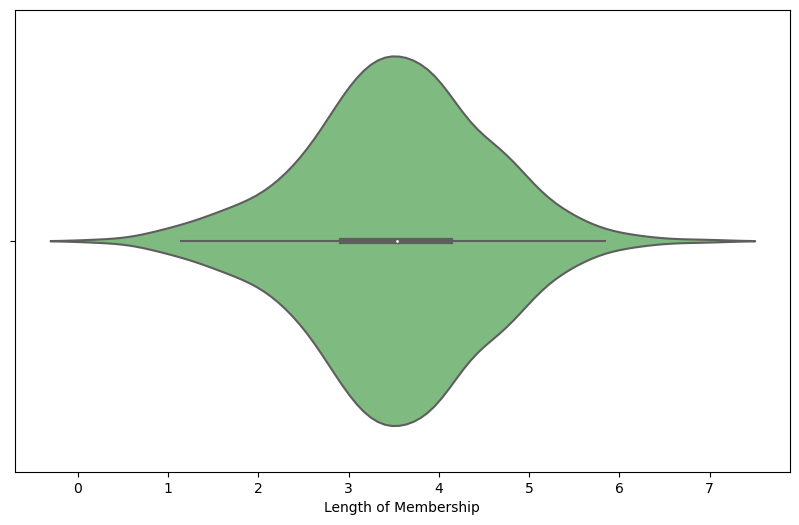

In [157]:

for coluna in df_data.select_dtypes(['float','int']).drop('Yearly Amount Spent',axis=1).columns:
    plt.figure(figsize=(10,6))
    sns.violinplot(data=df_data,x=coluna,palette='Greens_r')
    plt.show()

<AxesSubplot:>

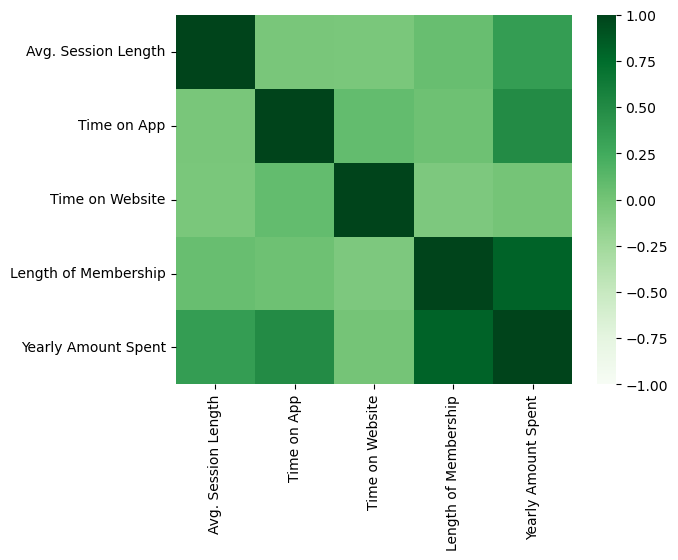

In [158]:
sns.heatmap(df_data.corr(),cmap='Greens',center=0,vmin=-1,vmax=1)

## Separando os dados
X são os preditores e y é a saída. O que queremos fazer é criar um modelo que pegue os valores da variável X e preveja y com um algoritmo de regressão linear. Usaremos a biblioteca SciKit Learn para criar o modelo.

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 35.2+ KB


In [161]:
df_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [162]:
X = df_data[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df_data['Yearly Amount Spent']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## Treinando o modelo com regressão multivariável usando Scikit Learn

Nesta seção, criamos o modelo e alimentamos ele com os dados de treinamento. Este modelo nos dirá qual insumo tem o maior impacto no produto (despesas anuais). Conforme sugerido pelos gráficos, descobrimos que o coeficiente mais importante é o do preditor "Duração da associação", seguido pelo 'Tempo no aplicativo' e pelo 'Média. Duração da sessão'. O tempo no site não parece ser um fator importante para o valor que um cliente gasta por ano.

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
regressor = LinearRegression().fit(X_train, y_train)

In [166]:
regressor.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [167]:
regressor.score(X,y) #r quadrado

0.9842821675307222

## Treinando o modelo com regressão multivariável usando OLS

Permite-nos obter mais detalhes sobre o modelo

In [168]:
import statsmodels.api as sm
X = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train)
model = model.fit()

display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.161e+04
Date:                 Tue, 16 Jul 2024   Prob (F-statistic):                        0.00
Time:                         14:57:10   Log-Likelihood:                         -1596.7
No. Observations:                  350   AIC:                                      3201.
Df Residuals:                      346   BIC:                                      3217.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     11.8105      0.951     12.420      0.000       9.940      13.681
Time on App             34.6182      1.223     28.312      0.000      32.213      37.023
Time on Website        -14.0783      0.869    -16.204      0.000     -15.787     -12.370
Length of Membership    60.4197      1.214     49.783      0.000      58.033      62.807
==============================================================================
Omnibus:                        0.333   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.847   Jarque-Bera (JB):                0.455
Skew:                           0.049   Prob(JB):                        0.797
Kurtosis:                       2.854   Cond. No.                         53.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
pred = regressor.predict(X_test)

## Previsão de dados de teste
Agora que o modelo está treinado, devemos ser capazes de usá-lo para fazer nossas previsões e avaliar nosso modelo. O gráfico de dispersão abaixo representa os valores reais de y para as previsões do modelo. O modelo parece se comportar com precisão.

In [170]:
df_showed =y_test.to_frame()
df_showed['Predictions'] = pred
df_showed

,Yearly Amount Spent,Predictions
361,401.033135,403.669931
73,534.777188,542.577563
374,418.602742,427.065917
155,503.978379,502.024604
104,410.069611,410.121436
...,...,...
266,554.003093,543.675918
23,519.340989,504.313005
222,502.409785,519.188022
261,514.009818,520.031552


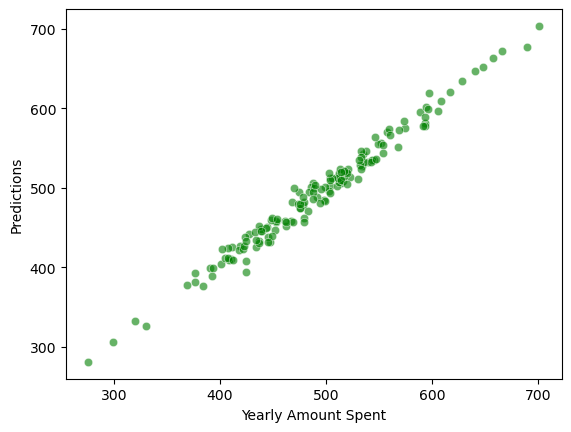

In [171]:
sns.scatterplot(data=df_showed,x='Yearly Amount Spent',y="Predictions",alpha=.6,color='Green'); #'Looking good'

## Avaliação do modelo

In [172]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [173]:
print('Mean Absolute Error:',mean_absolute_error(y_test, pred))
print('Mean Squared Error:',mean_squared_error(y_test, pred))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 8.4260916414321
Mean Squared Error: 103.9155413650332
Root Mean Squared Error: 10.19389726086315


## Resíduos

Gráfico de distribuição dos resíduos das previsões do modelo. Eles devem ser normalmente distribuídos.

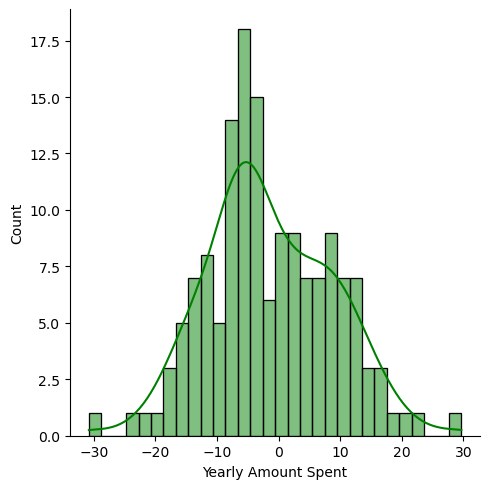

In [174]:
resid = y_test-pred
sns.displot(resid, bins=30,kde=True,color='Green');

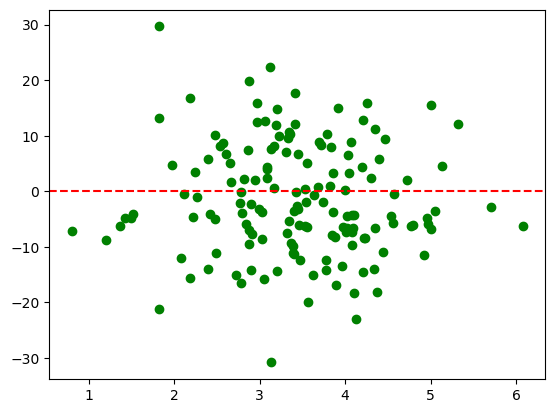

In [175]:
plt.scatter(X_test['Length of Membership'],resid,color='g')
plt.axhline(0, color='red', linestyle='--')

## Conclusão
Pode ser complicado interpretar as informações nesta análise. De acordo com o modelo, o fator mais significativo para os clientes não é o tempo gasto no aplicativo ou site, mas sim o tempo de adesão. No entanto, dos dois preditores (desktop vs aplicativo), o aplicativo tem, de longe, a influência mais forte. Na verdade, o tempo gasto no site para desktop não parece ter nenhuma correlação! Ou seja, de acordo com os dados, a quantidade de tempo que o cliente passa no site para desktop quase nada tem a ver com a quantidade de dinheiro que vai gastar.

Poderíamos interpretar isso de duas maneiras diferentes. Em primeiro lugar, isso pode significar que o site para desktop precisa de mais trabalho para fazer com que os visitantes comprem mais. Em segundo lugar, pode significar que as pessoas tendem a ser mais influenciadas pelas aplicações móveis das lojas online do que pelos websites para computador. Então, talvez os esforços devam ser direcionados para tirar vantagem desse fato. Na verdade, a interpretação desta informação requer conhecimentos na esfera do marketing online. Nossa análise e nosso modelo, entretanto, fazem um trabalho muito bom ao ponderar a importância dos preditores.Conclusão
Pode ser complicado interpretar as informações nesta análise. De acordo com o modelo, o fator mais significativo para os clientes não é o tempo gasto no aplicativo ou site, mas sim o tempo de adesão. No entanto, dos dois preditores (desktop vs aplicativo), o aplicativo tem, de longe, a influência mais forte. Na verdade, o tempo gasto no site para desktop não parece ter nenhuma correlação! Ou seja, de acordo com os dados, a quantidade de tempo que o cliente passa no site para desktop quase nada tem a ver com a quantidade de dinheiro que vai gastar.

Poderíamos interpretar isso de duas maneiras diferentes. Em primeiro lugar, isso pode significar que o site para desktop precisa de mais trabalho para fazer com que os visitantes comprem mais. Em segundo lugar, pode significar que as pessoas tendem a ser mais influenciadas pelas aplicações móveis das lojas online do que pelos websites para computador. Então, talvez os esforços devam ser direcionados para tirar vantagem desse fato. Na verdade, a interpretação desta informação requer conhecimentos na esfera do marketing online. Nossa análise e nosso modelo, entretanto, fazem um trabalho muito bom ao ponderar a importância dos preditores.